As a reminder the objective of this study is to predict the total claim amount of a customer and study/investigate the impact of the factors (input features) on the target variable(total claim amount). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.

1)Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

2)Now we will try to check the normality of the numerical variables visually
-Use seaborn library to construct distribution plots for the numerical variables
-Use Matplotlib to construct histograms.
-Do the distributions for different numerical variables look like a normal distribution?

3)For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.

4)Plot the Correlation Heatmap.

5)(Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [84]:
import statistics as stats
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


1)Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [86]:
#Using the np.number function to seperate the numeric columns from the categorical and storing it in a new variable
numerical = df.select_dtypes(include = np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [87]:
#seperating the categorical columns from the numerical and storing it in a new variable
categoricals = df.select_dtypes(include = np.object)
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


2)Now we will try to check the normality of the numerical variables visually -Use seaborn library to construct distribution plots for the numerical variables -Use Matplotlib to construct histograms. -Do the distributions for different numerical variables look like a normal distribution?

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

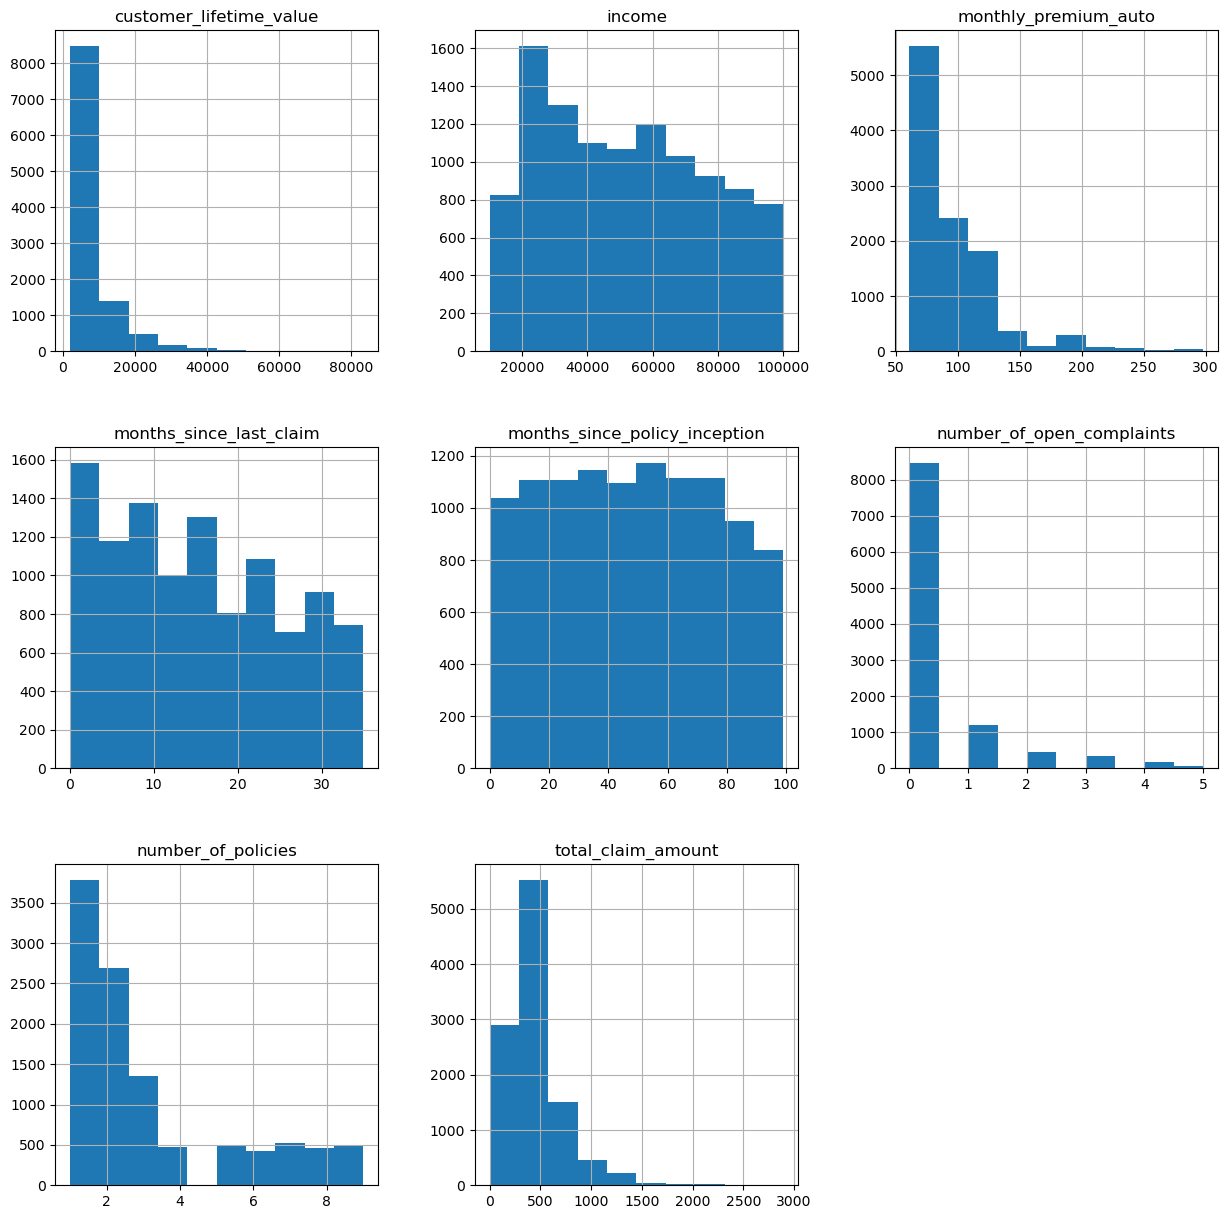

In [88]:
#using histograms for all the numerical data
numerical.hist(figsize=(15,15)) #data looks non normal
#OR:
#df.hist(figsize=(15,15))

<AxesSubplot:xlabel='income', ylabel='Density'>

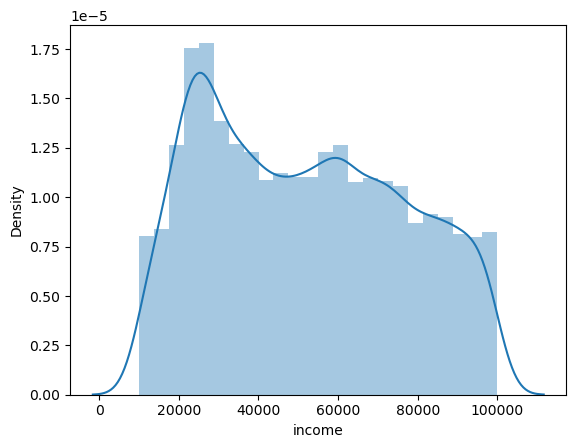

In [89]:
sns.distplot(numerical.income) #nice.
#but not normal

3)For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.

In [90]:
#looking at correlation in the dataframe
df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='customer_lifetime_value'>

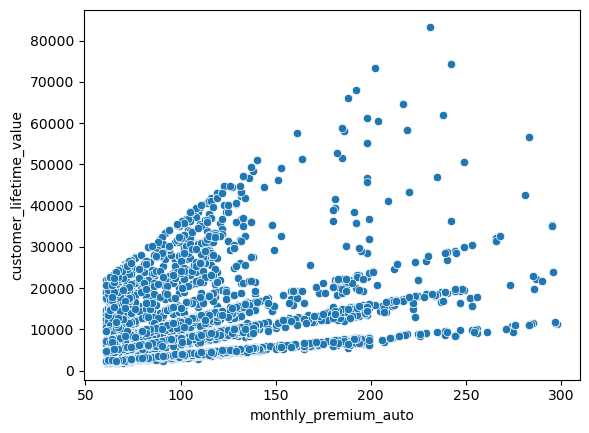

In [91]:
#looking for correlation between the monthly premium auto and the customer lifetime value as on the df of cor
#it looks like it might be one of the higher values of correlation
sns.scatterplot(x=numerical.monthly_premium_auto,y=numerical.customer_lifetime_value)

<AxesSubplot:>

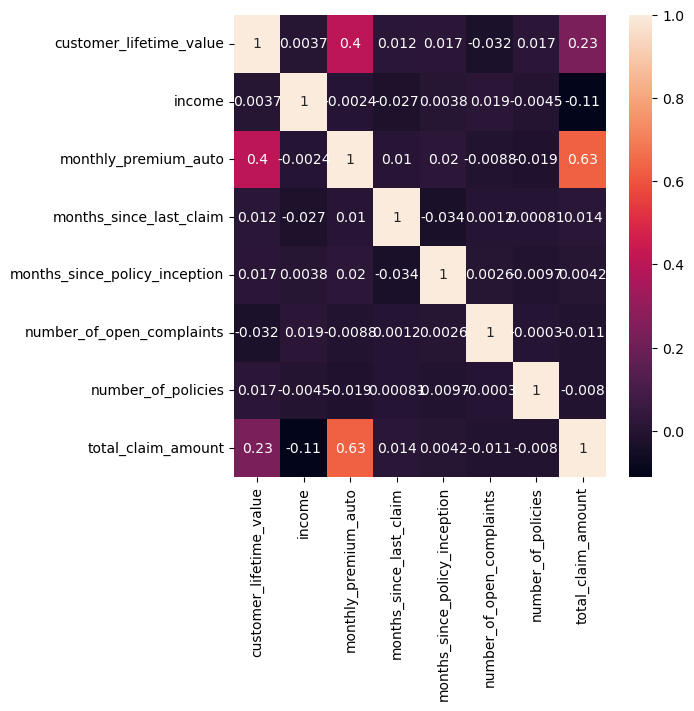

In [92]:
#heatmap for the dataframe
fig=plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

In [93]:
corr_matrix = df.corr()
print(corr_matrix)
corr_matrix.to_excel(r'C:\Users\Monika\Documents\GitHub\MonikaLabs\Week 3\CorrMatrix4.xlsx')

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   
total_claim_amount                            0.232849 -0.111221   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                

1)Show a plot of the total number of responses.

2)Show a plot of the response by the sales channel.

3)Show a plot of the response by the total claim amount.

4)Show a plot of the response by income.

5)(Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.

6)Clean your notebook and make it readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

1)Show a plot of the total number of responses.

In [94]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [95]:
count_resp = df['response'].value_counts()

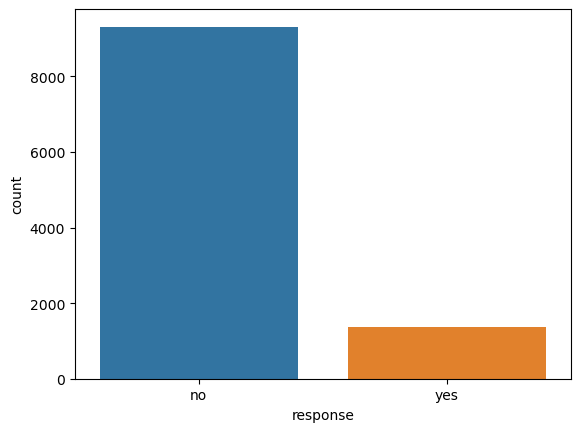

In [96]:
plot_resp = sns.countplot(x="response", data=df)

Text(0, 0.5, 'Count')

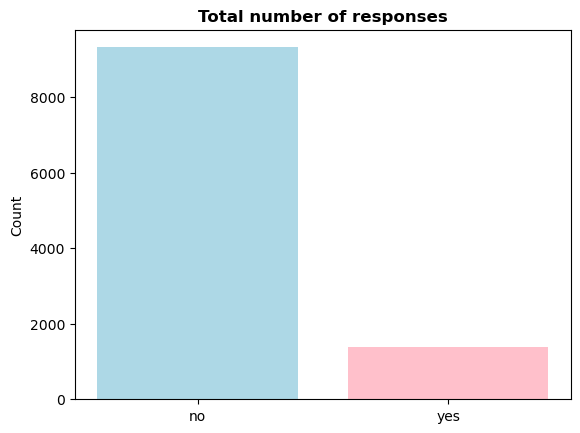

In [97]:
plt.bar(count_resp.index, count_resp, color=('lightblue','pink'))
plt.title('Total number of responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"])
plt.ylabel('Count')

2)Show a plot of the response by the sales channel.

In [98]:
df['sales_channel'].value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [99]:
df_grouped = df.groupby(['response','sales_channel'])['response'].count().rename('count').reset_index()

In [100]:
df_grouped

,response,sales_channel,count
0,no,agent,3340
1,no,branch,2665
2,no,call center,1890
3,no,web,1421
4,yes,agent,679
5,yes,branch,310
6,yes,call center,209
7,yes,web,175


<AxesSubplot:title={'center':'Response by the sales channel'}, xlabel='sales_channel', ylabel='count'>

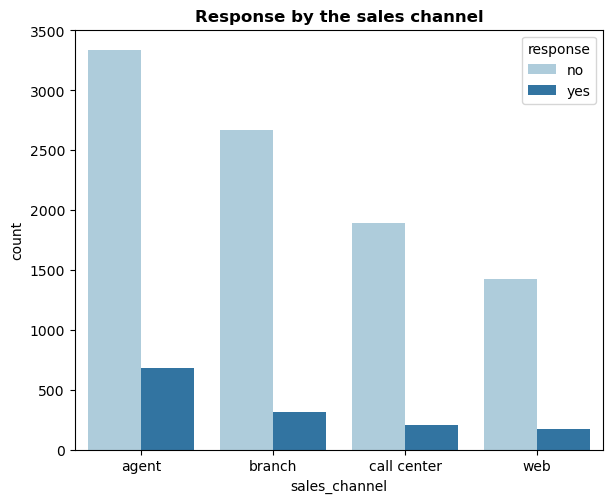

In [101]:
palette_sales = sns.color_palette("Paired")
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.title('Response by the sales channel', size='12', fontweight='bold')

sns.barplot(x = df_grouped['sales_channel'],y = df_grouped['count'],hue = df_grouped['response'], palette=palette_sales)

3)Show a plot of the response by the total claim amount.

In [102]:
df_grouped_claim = df.groupby(['response','total_claim_amount'])['response'].count().rename('count').reset_index()
df_grouped_claim

,response,total_claim_amount,count
0,no,0,9
1,no,1,9
2,no,2,12
3,no,3,9
4,no,4,12
...,...,...,...
1358,yes,1324,7
1359,yes,1358,6
1360,yes,1416,1
1361,yes,1443,1


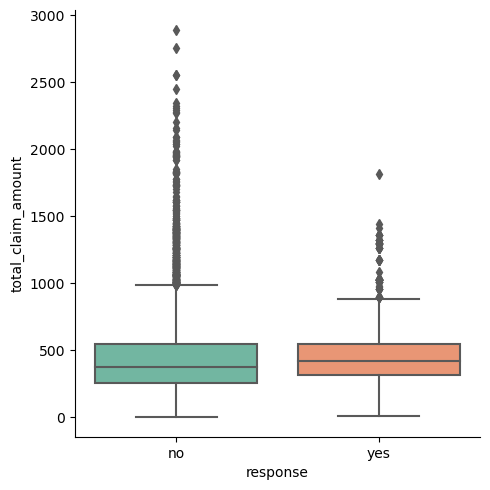

In [103]:
palette_claim = sns.color_palette("Set2")
plot_claim2 = sns.catplot(data=df, x="response", y="total_claim_amount", kind="box", palette=palette_claim)

In [104]:
import sklearn

In [105]:
from sklearn.preprocessing import PowerTransformer

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
from sklearn.preprocessing import minmax_scale

Week 4, Monday lab

check if there are highly correlated features and drop them if there are any.

In [108]:
#Checking the dataframe correlation
df.corr() # highest correlation is 0.4 and its not high, it is medium

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [109]:
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [110]:
for i in df.columns:
    print(i)

region
customer_lifetime_value
response
coverage
education
effective_to_date
month
employment_status
gender
income
location_code
marital_status
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
policy_type
policy
renew_offer_type
sales_channel
total_claim_amount
vehicle_class
vehicle_size


In [111]:
df["response"].value_counts()

no     9316
yes    1373
Name: response, dtype: int64

In [121]:
#making the responses binary with a function
def clean_response(x):
    if x in ['yes']:
        return 0
    elif x in ['no']:
        return 1
    else:
        return x

In [122]:

df['response']= df['response'].apply(clean_response)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,1,4809,1,0,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,0,2228,1,0,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,3,14947,1,0,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,2,22332,0,1,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,2,9025,1,2,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,15563,1,2,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,2,5259,1,0,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,1,23893,1,1,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,0,11971,1,2,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [114]:
categoricals["region"].value_counts()

west region    3678
central        3071
north west     3011
east            929
Name: region, dtype: int64

In [115]:
# making the regions numerical
def clean_region(x):
    if x in ['west region']:
        return 0
    elif x in ['central']:
        return 1
    elif x in ['north west']:
        return 2
    elif x in ['east']:
        return 3
    else:
        return x

In [116]:
df['region']= df['region'].apply(clean_region)

In [117]:
df["coverage"].value_counts()

basic       6523
extended    3206
premium      960
Name: coverage, dtype: int64

In [118]:
# making the coverage numerical (basic, extended, premium)
def clean_coverage(x):
    if x in ['basic']:
        return 0
    elif x in ['extended']:
        return 1
    elif x in ['premium']:
        return 2
    else:
        return x

In [124]:
df['coverage']= df['coverage'].apply(clean_coverage)

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [126]:
df["education"].value_counts()

bachelor                3210
college                 3141
high school or below    3076
master                   873
doctor                   389
Name: education, dtype: int64

bachelor                0 
college                 1
high school or below    2
master                   3
doctor                   4

In [129]:
# making the education numerical
def clean_edu(x):
    if x in ['bachelor']:
        return 0
    elif x in ['college']:
        return 1
    elif x in ['high school or below']:
        return 2
    elif x in ['master']:
        return 3
    elif x in ['doctor']:
        return 4
    else:
        return x

In [131]:
df['education']= df['education'].apply(clean_edu)

In [132]:
df["month"].value_counts()

jan    5684
feb    5005
Name: month, dtype: int64

In [133]:
#making the months binary
def clean_months(x):
    if x in ['jan']:
        return 0
    elif x in ['feb']:
        return 1
    else:
        return x

In [136]:
df['month']= df['month'].apply(clean_months)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,1,4809,1,0,1,2/18/11,1,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,0,2228,1,0,1,1/18/11,0,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,3,14947,1,0,0,2/10/11,1,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,2,22332,0,1,1,1/11/11,0,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,2,9025,1,2,0,1/17/11,0,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,15563,1,2,0,1/19/11,0,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,2,5259,1,0,1,1/6/11,0,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,1,23893,1,1,0,2/6/11,1,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,0,11971,1,2,1,2/13/11,1,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [144]:
def clean_gender(x):
    if x in ['m']:
        return 0
    elif x in ['f']:
        return 1
    else:
        return x

In [145]:
df['gender']= df['gender'].apply(clean_gender)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,1,4809,1,0,1,2/18/11,1,employed,0,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,0,2228,1,0,1,1/18/11,0,unemployed,1,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,3,14947,1,0,0,2/10/11,1,employed,0,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,2,22332,0,1,1,1/11/11,0,employed,0,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,2,9025,1,2,0,1/17/11,0,medical leave,1,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,15563,1,2,0,1/19/11,0,unemployed,1,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,2,5259,1,0,1,1/6/11,0,employed,1,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,1,23893,1,1,0,2/6/11,1,employed,1,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,0,11971,1,2,1,2/13/11,1,employed,1,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [147]:
df["employment_status"].value_counts()

employed         6658
unemployed       2751
medical leave     490
disabled          489
retired           301
Name: employment_status, dtype: int64

In [148]:
def clean_employment(x):
    if x in ['employed']:
        return 0
    elif x in ['unemployed']:
        return 1
    elif x in ['medical leave']:
        return 2
    elif x in ['disabled']:
        return 3
    elif x in ['retired']:
        return 4
    else:
        return x

In [150]:
df['employment_status']= df['employment_status'].apply(clean_employment)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,1,4809,1,0,1,2/18/11,1,0,0,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,0,2228,1,0,1,1/18/11,0,1,1,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,3,14947,1,0,0,2/10/11,1,0,0,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,2,22332,0,1,1,1/11/11,0,0,0,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,2,9025,1,2,0,1/17/11,0,2,1,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,15563,1,2,0,1/19/11,0,1,1,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,2,5259,1,0,1,1/6/11,0,0,1,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,1,23893,1,1,0,2/6/11,1,0,1,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,0,11971,1,2,1,2/13/11,1,0,1,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [158]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [162]:
categorical
categorical = pd.get_dummies(df, columns = ['location_code', 'marital_status','sales_channel', 'vehicle_class', 'vehicle_size'])

In [163]:
categorical

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,4809,1,0,1,2/18/11,1,0,0,48029,...,0,1,0,0,0,0,0,0,1,0
1,0,2228,1,0,1,1/18/11,0,1,1,92260,...,0,1,0,0,0,0,0,0,1,0
2,3,14947,1,0,0,2/10/11,1,0,0,22139,...,0,0,0,0,0,1,0,0,1,0
3,2,22332,0,1,1,1/11/11,0,0,0,49078,...,0,1,0,0,0,0,0,0,1,0
4,2,9025,1,2,0,1/17/11,0,2,1,23675,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,15563,1,2,0,1/19/11,0,1,1,61541,...,1,0,1,0,0,0,0,0,1,0
10685,2,5259,1,0,1,1/6/11,0,0,1,61146,...,0,1,0,0,0,0,0,0,1,0
10686,1,23893,1,1,0,2/6/11,1,0,1,39837,...,1,0,0,1,0,0,0,0,1,0
10687,0,11971,1,2,1,2/13/11,1,0,1,64195,...,0,0,0,0,0,1,0,0,1,0


In [161]:
categorical['location_code']=le.fit_transform(categorical['location_code'])
categorical['marital_status']=le.fit_transform(categorical['marital_status'])
categorical['sales_channel']=le.fit_transform(categorical['sales_channel'])
categorical['vehicle_class']=le.fit_transform(categorical['vehicle_class'])
categorical['vehicle_size']=le.fit_transform(categorical['vehicle_size'])

KeyError: 'marital_status'